<a href="https://colab.research.google.com/github/la2015-hw/Group_10/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 10 F20DL CW1

### Mounting Google Drive to access the dataset.
### The Galaxy Zoo 2 **Table 5** catalog (`zoo2MainSpecz.csv`) contains galaxy classifications, including votes and derived features.  


In [11]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### Importing dataset using **pandas** for further exploration and analysis.

In [12]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/sdss_gz2_matched_cleaned_balanced.csv')
df.head()

,specobjid,dr8objid,dr7objid,ra,dec,rastring,decstring,sample,gz2class,total_classifications,...,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag,broad_class
0,614788390251948032,1.237654e+18,587728665578700971,122.952644,42.216805,08:11:48.63,+42:13:00.5,original,SBc?m,47,...,0.0,0.0,0,1,1.0,1.000,1.000,1.000000,0,Spiral-barred
1,2433194008562919424,1.237665e+18,587739651567845579,231.428600,23.370867,15:25:42.86,+23:22:15.1,original,Ser,40,...,0.0,0.0,0,0,0.0,0.000,0.000,0.000000,0,Irregular
2,2080728518915811328,1.237663e+18,587736975809773641,232.551060,27.134108,15:30:12.25,+27:08:02.8,original,SBc2m,44,...,0.0,0.0,0,0,0.0,0.000,0.000,0.000000,0,Spiral-barred
3,1563980851195176960,1.237662e+18,587736619321917717,234.050800,30.967339,15:36:12.19,+30:58:02.4,original,SBd2m,55,...,0.0,0.0,0,2,2.0,0.062,0.062,0.046002,0,Spiral-barred
4,3139079110530197504,1.237666e+18,587739843772940458,217.789000,20.449600,14:31:09.36,+20:26:58.6,original,SBa2l,34,...,0.0,0.0,0,0,0.0,0.000,0.000,0.000000,0,Spiral-barred


###After the dataset is loaded we check for the dimentions(rows and columns) to see how big the dataset is.

In [13]:
print("Shape:", df.shape)

Shape: (47600, 234)


In [14]:
df.describe()

,specobjid,dr8objid,dr7objid,ra,dec,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
count,4.760000e+04,4.760000e+04,4.760000e+04,47600.000000,47600.000000,47600.000000,47600.000000,47600.000000,47600.000000,47600.000000,...,47600.000000,47600.000000,47600.000000,47600.000000,47600.000000,47600.000000,47600.000000,47600.000000,47600.000000,47600.000000
mean,1.758822e+18,1.237661e+18,5.878150e+17,186.331513,25.772791,42.491008,187.034328,24.235231,24.114920,0.562800,...,0.013837,0.013604,0.015718,0.000105,1.637101,1.634903,0.242681,0.241764,0.243459,0.005315
std,8.135711e+17,5.351812e+12,1.763893e+14,46.914442,17.699044,5.957566,65.189830,13.420649,13.401411,0.293167,...,0.087313,0.086293,0.093456,0.010249,3.061995,3.060184,0.350556,0.350020,0.351037,0.072712
min,2.994905e+17,1.237649e+18,5.877230e+17,0.116568,-3.743851,17.000000,77.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070807e+18,1.237658e+18,5.877331e+17,155.510150,10.972883,39.000000,142.000000,13.000000,13.000000,0.324000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.833074e+18,1.237662e+18,5.877394e+17,186.986650,24.373419,43.000000,162.000000,27.000000,26.445500,0.641000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.407251e+18,1.237665e+18,5.877429e+17,220.488297,38.712880,46.000000,211.000000,36.000000,35.014250,0.818000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.438000,0.429000,0.429000,0.000000
max,3.348588e+18,1.237675e+18,5.888489e+17,359.973940,69.879510,76.000000,528.000000,62.000000,62.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,31.000000,31.000000,1.000000,1.000000,1.000000,1.000000


### We are checking for **missing and null** values to see which columns need cleaning.

In [18]:
print(df.isna().sum().sort_values(ascending=False).head(20))

specobjid                                               0
dr8objid                                                0
dr7objid                                                0
ra                                                      0
dec                                                     0
rastring                                                0
decstring                                               0
sample                                                  0
gz2class                                                0
total_classifications                                   0
total_votes                                             0
t01_smooth_or_features_a01_smooth_count                 0
t01_smooth_or_features_a01_smooth_weight                0
t01_smooth_or_features_a01_smooth_fraction              0
t01_smooth_or_features_a01_smooth_weighted_fraction     0
t01_smooth_or_features_a01_smooth_debiased              0
t01_smooth_or_features_a01_smooth_flag                  0
t01_smooth_or_

In [6]:
df = df.dropna()

In [17]:
print("New shape:", df.shape)
print(df.isna().sum().sum(), "missing values remaining")

New shape: (47600, 234)
0 missing values remaining


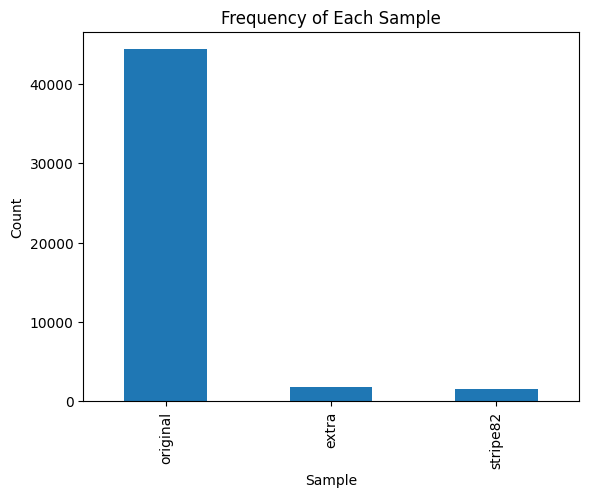

In [19]:
import matplotlib.pyplot as plt

df['sample'].value_counts().plot(kind='bar')

plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Frequency of Each Sample')
plt.show()

original = main galaxies from galaxyZoo 1


extra = added galaxies


stripe82 = Galaxies from the SDSS Stripe 82 region, a specific area of the sky that was imaged repeatedly for deeper observations.

In [20]:
df_selected = df[[
    "specobjid",
    "sample",
    "gz2class",
    "total_classifications",
    "total_votes",
    "t01_smooth_or_features_a01_smooth_count",
    "t01_smooth_or_features_a01_smooth_weight",
    "t01_smooth_or_features_a01_smooth_fraction",
    "t01_smooth_or_features_a01_smooth_weighted_fraction",
    "t01_smooth_or_features_a01_smooth_debiased",
    "t01_smooth_or_features_a01_smooth_flag"
]]

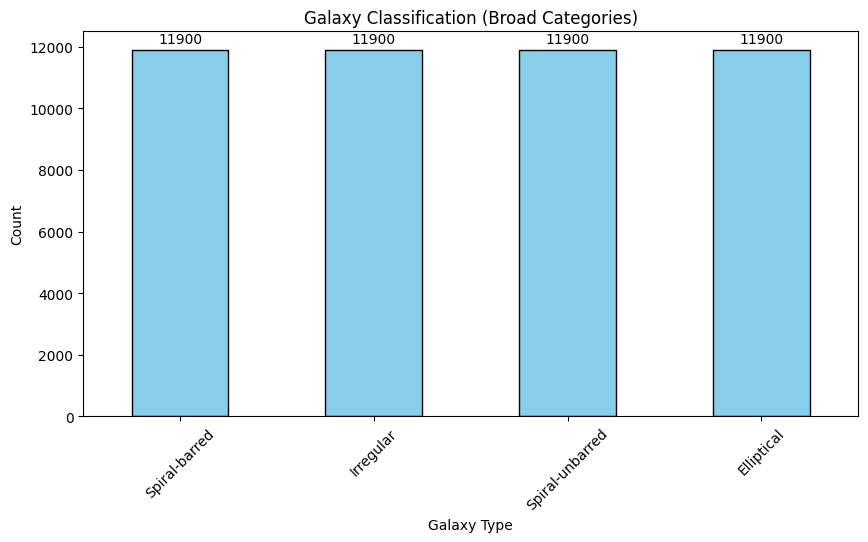

In [21]:
# mapping dictionary
mapping = {
    "E": "Elliptical",
    "S": "Spiral-unbarred",
    "SB": "Spiral-barred",
    "Ir": "Irregular",
    "A": "Artifact"
}

# function to classify each galaxy
def classify_galaxy(gz2class):
    if gz2class.startswith("E"):
        return mapping["E"]
    elif gz2class.startswith("Sa") or gz2class.startswith("Sb") or gz2class.startswith("Sc") or gz2class.startswith("Sd"):
        return mapping["S"]
    elif gz2class.startswith("SBa") or gz2class.startswith("SBb") or gz2class.startswith("SBc") or gz2class.startswith("SBd"):
        return mapping["SB"]
    elif gz2class.startswith("Sen") or gz2class.startswith("Seb") or gz2class.startswith("Ser"):
        return mapping["Ir"]
    elif gz2class == "A":
        return mapping["A"]
    else:
        return "Other"


# apply classification
df["broad_class"] = df["gz2class"].apply(classify_galaxy)

class_counts = df[df["broad_class"] != "Artifact"]["broad_class"].value_counts()

# plot
plt.figure(figsize=(10,5))
bars = class_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Galaxy Classification (Broad Categories)")
plt.xlabel("Galaxy Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

# add counts above bars
for i, count in enumerate(class_counts.values):
    plt.text(i, count + (0.01 * max(class_counts.values)), str(count), ha='center', va='bottom')

plt.show()


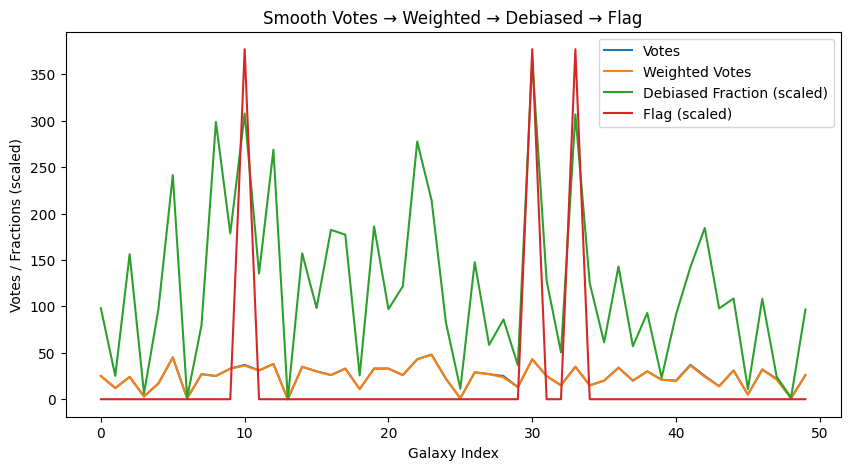

In [22]:

df_sample = df_selected.sample(50, random_state=1)

plt.figure(figsize=(10,5))

plt.plot(df_sample['t01_smooth_or_features_a01_smooth_count'].values, label='Votes')

plt.plot(df_sample['t01_smooth_or_features_a01_smooth_weight'].values, label='Weighted Votes')

plt.plot(df_sample['t01_smooth_or_features_a01_smooth_debiased'].values * df_sample['total_votes'].max(),
         label='Debiased Fraction (scaled)')

plt.plot(df_sample['t01_smooth_or_features_a01_smooth_flag'].values * df_sample['total_votes'].max(),
         label='Flag (scaled)')

plt.xlabel('Galaxy Index')
plt.ylabel('Votes / Fractions (scaled)')
plt.title('Smooth Votes → Weighted → Debiased → Flag')
plt.legend()
plt.show()


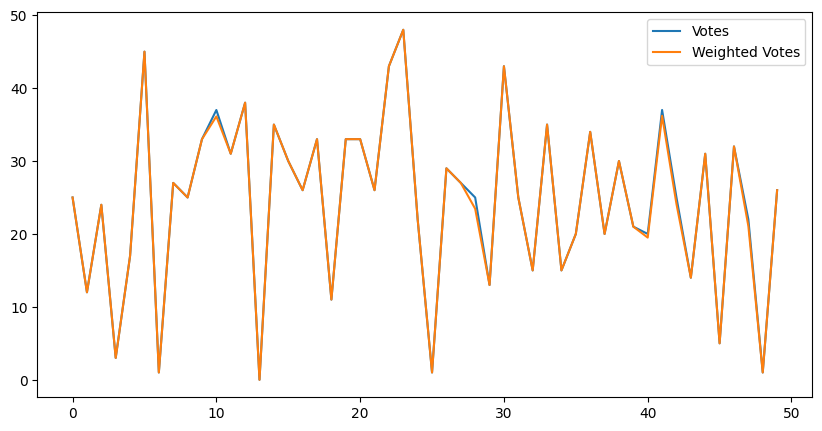

In [23]:
df_sample = df_selected.sample(50, random_state=1)  # 50 random galaxies

plt.figure(figsize=(10,5))

# Plot raw counts
plt.plot(df_sample['t01_smooth_or_features_a01_smooth_count'].values, label='Votes')

# Plot weighted counts
plt.plot(df_sample['t01_smooth_or_features_a01_smooth_weight'].values, label='Weighted Votes')
plt.legend()
plt.show()

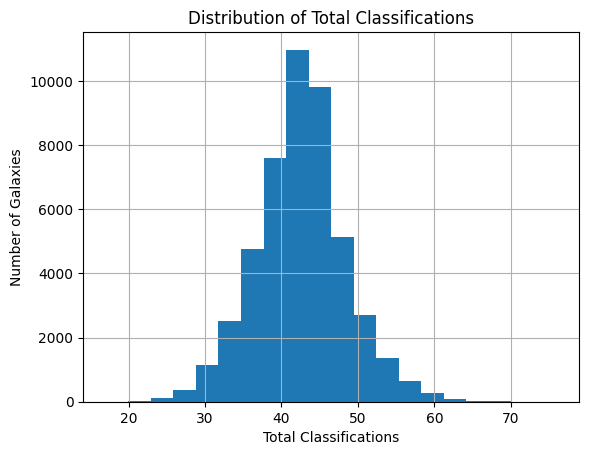

In [24]:
df_selected['total_classifications'].hist(bins=20)
plt.xlabel('Total Classifications')
plt.ylabel('Number of Galaxies')
plt.title('Distribution of Total Classifications')
plt.show()

total classifications mean number of times a person classified or voted on that specific galaxy

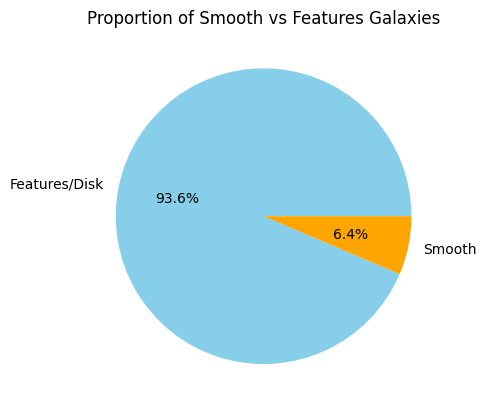

In [25]:
# 0 = Features/disk, 1 = Smooth
counts = df["t01_smooth_or_features_a01_smooth_flag"].value_counts()

# map numeric flags to labels
counts.index = counts.index.map({1: "Smooth", 0: "Features/Disk"})

# pie chart
counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.ylabel('')
plt.title('Proportion of Smooth vs Features Galaxies')
plt.show()




*   Total galaxies: 243,500
*   Most common class: Eliptical (42.5%)
*   Sperical galaxies: 38.7%
*   Barred spericals: 8.7%
*   Irregular/odd: 9.8%








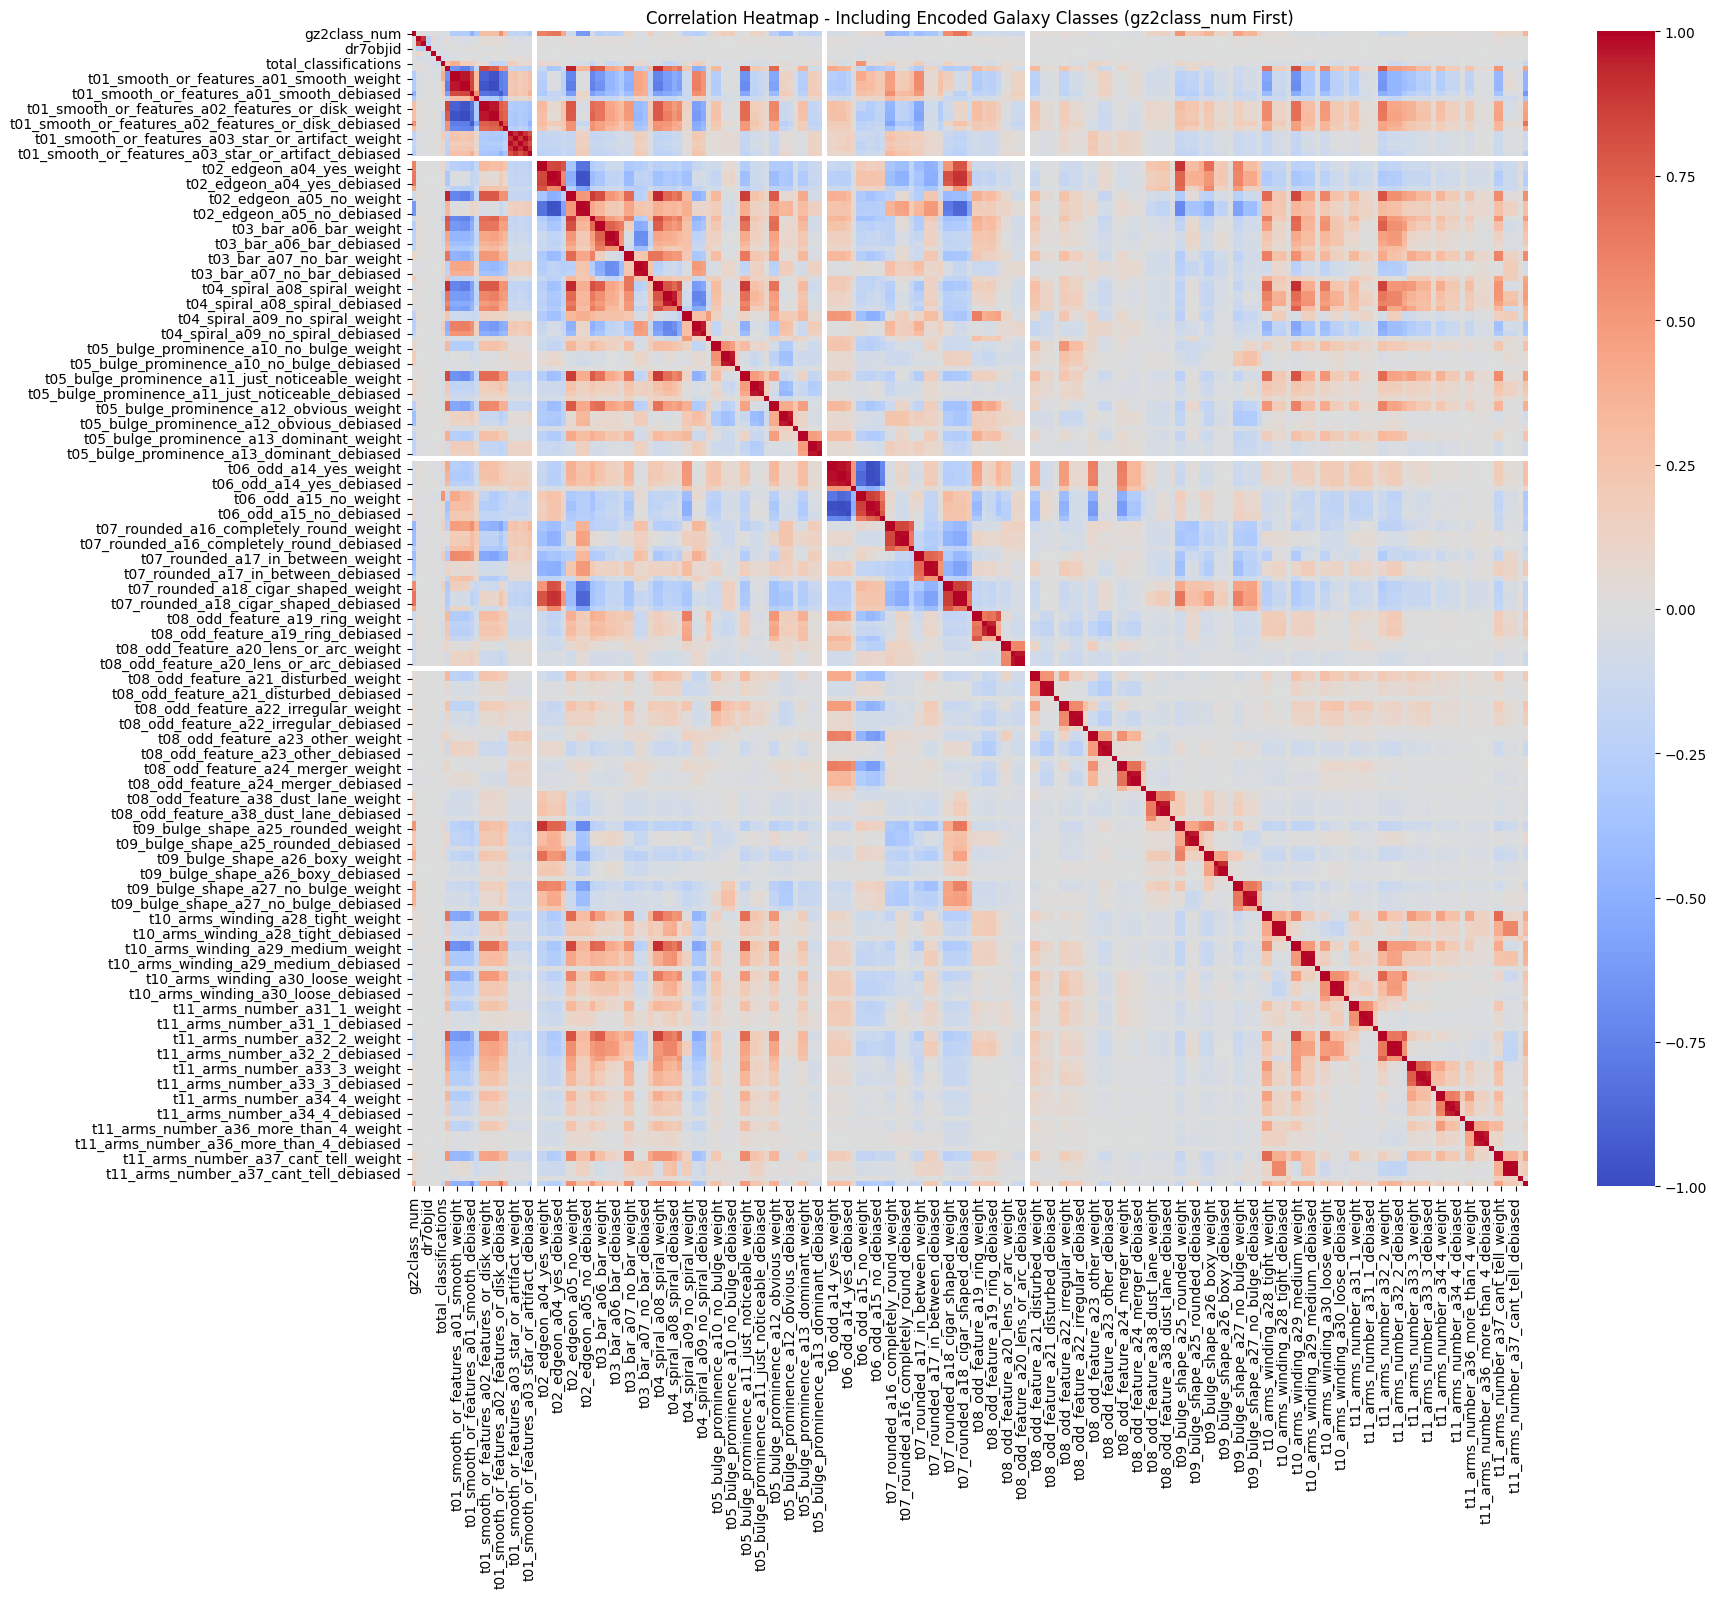

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# make a copy
df_encoded = df.copy()

# encode categorical columns
le = LabelEncoder()
df_encoded["gz2class_num"] = le.fit_transform(df_encoded["gz2class"].astype(str))
df_encoded["broad_class_num"] = le.fit_transform(df_encoded["broad_class"].astype(str))

# ensure numeric type
df_encoded["gz2class_num"] = pd.to_numeric(df_encoded["gz2class_num"], errors='coerce')
df_encoded["broad_class_num"] = pd.to_numeric(df_encoded["broad_class_num"], errors='coerce')

# select numeric columns (includes encoded ones)
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# reorder columns so gz2class_num appears first
cols = numeric_df.columns.tolist()
if "gz2class_num" in cols:
    cols.insert(0, cols.pop(cols.index("gz2class_num")))  # move gz2class_num to front
numeric_df = numeric_df[cols]

# compute correlation matrix
corr_2 = numeric_df.corr()

# reorder correlation matrix so gz2class_num appears first both horizontally and vertically
corr_2 = corr_2.loc[cols, cols]

# plot heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_2, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Including Encoded Galaxy Classes (gz2class_num First)')
plt.show()



Numeric columns in correlation map:
 ['specobjid', 'total_classifications', 'total_votes', 't01_smooth_or_features_a01_smooth_count', 't01_smooth_or_features_a01_smooth_weight', 't01_smooth_or_features_a01_smooth_fraction', 't01_smooth_or_features_a01_smooth_weighted_fraction', 't01_smooth_or_features_a01_smooth_debiased', 't01_smooth_or_features_a01_smooth_flag', 'gz2class_num', 'sample_num']


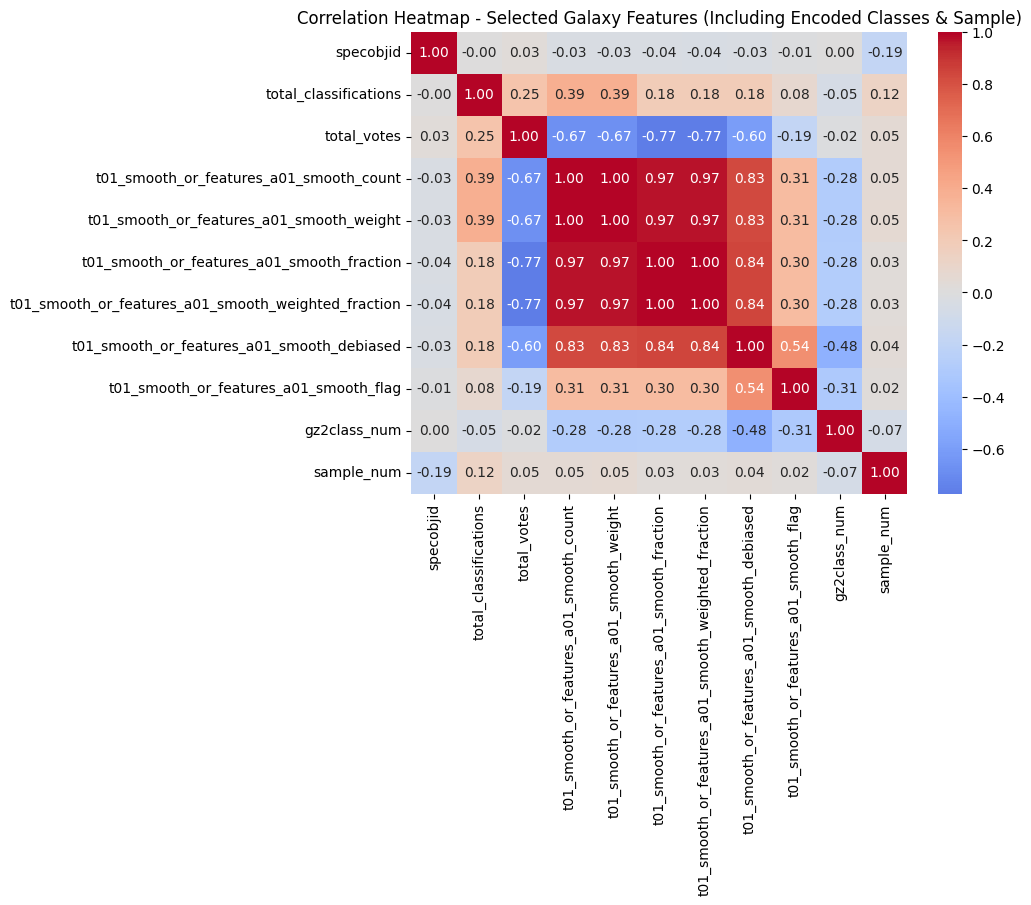

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# make a copy of the selected df
df_selected_encoded = df_selected.copy()

# encode non-numeric columns
le = LabelEncoder()
df_selected_encoded["gz2class_num"] = le.fit_transform(df_selected_encoded["gz2class"].astype(str))
df_selected_encoded["sample_num"] = le.fit_transform(df_selected_encoded["sample"].astype(str))

# ensure numeric type (prevents dtype issues)
df_selected_encoded["gz2class_num"] = pd.to_numeric(df_selected_encoded["gz2class_num"], errors='coerce')
df_selected_encoded["sample_num"] = pd.to_numeric(df_selected_encoded["sample_num"], errors='coerce')

# now select numeric columns (AFTER encoding)
numeric_df_selected = df_selected_encoded.select_dtypes(include=['float64', 'int64'])

# check column names to confirm inclusion
print("Numeric columns in correlation map:\n", numeric_df_selected.columns.tolist())

# compute correlation
corr_selected = numeric_df_selected.corr()

# plot
plt.figure(figsize=(8,6))
sns.heatmap(corr_selected, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Correlation Heatmap - Selected Galaxy Features (Including Encoded Classes & Sample)')
plt.show()
